

# Project: Investigate a Dataset for No-show medical appointments in Brazil   


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project is focused on the of whether or not patients show up for their appointment. The dataset that is provided collects information from 100k medical appointments in Brazil. I will answer the questions that could be asked from this dataset after I wrangle and analyse this dataset. 

This project will try to answer the follwing questions

#### Q1 : Does the SMS sendign has a value on show and no show cases ?
#### Q2 : Which people catogery "Infents or old people" has more No show percentage
#### Q3 : What is the infulnce of scheduled date and appointment day ?

In [104]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### import the Data

In [105]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [106]:
## Show staticstics about the data

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000




### Data Cleaning

<ul>
    <li>It is better to make the dashes "-" underscore "_"  </li>
    
</ul>

In [107]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.rename(columns={'No-show':'No_show'},inplace=True)

### Investigate more in the date 
#### Find the null values and duplicates

In [108]:
## first the find all column names

print(df.columns)


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')


#### Lets check the information of these columns like null values

In [109]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


So we have 110527 record total and eash column has 110527 values. This we can conclude we don't have null values.

### Checking duplicate values

In [110]:
# This will return unique values in dataset
df.nunique() 

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No_show                2
dtype: int64

#### As you can see above, AppintmentID has 110527 record which is the same value of rows, so we don't have duplicaed values. 
#### The rest of columns seems to be normal like 81 Neighbourhood , No_show,which can be yes or no and also the Gender which can be Male or Female. However, Age column has 104 unique value which unlikly to happen

### Checking Age values

In [111]:
df.Age.unique()


array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

As we can see above, there are -1 value which is not applicable for age and their old people that their age reach up to 115 years but it is ok. <br> <br>


so lets make remove -1 to clean our data

In [112]:
df = df[(df.Age >= 0)]
df.shape

(110526, 14)

In [113]:
## Verify
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

##### Lets convert Date into Date Type to deal with it later

In [114]:
df.ScheduledDay   = df.ScheduledDay.apply(np.datetime64)
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)


<a id='eda'></a>
## Exploratory Data Analysis



### What is the Average  showing patients  


In [115]:
# Finding the averge of showing patients
showP=100*(df['No_show'] == 'No').sum()/df.shape[0]
print(showP)

79.80656135208005


So the average of showing patients on their appointments is around 79%

### Are ages is efficting people of not showing to their appointments ?

Text(0,0.5,'No show percentage')

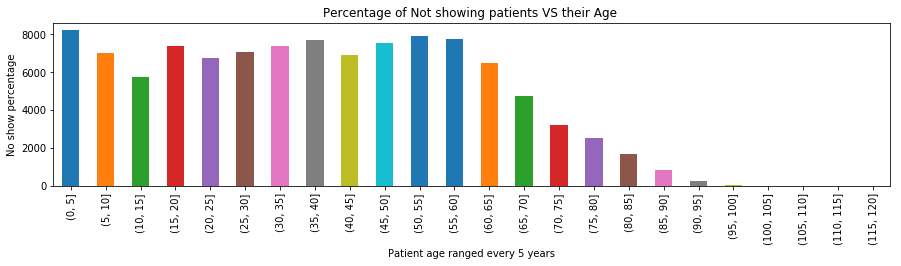

In [116]:
# Drwing Bar char to get clear picture
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]
# making No_Show values with numbers yes =1 , No=0
df['No_show_Number'] = df['No_show'].replace(('Yes', 'No'), (1, 0))
df['Age_bins'] = pd.cut(df['Age'], bins)
Age = df[['No_show_Number', 'Age_bins']].groupby('Age_bins').count()

BarChart = Age['No_show_Number'].plot(kind='bar',figsize=(15, 3), title='Percentage of Not showing patients VS their Age ')
BarChart.set_xlabel('Patient age ranged every 5 years')
BarChart.set_ylabel('No show percentage')


Lets improve our plot by excluding the patients above 95

Text(0,0.5,'No show percentage')

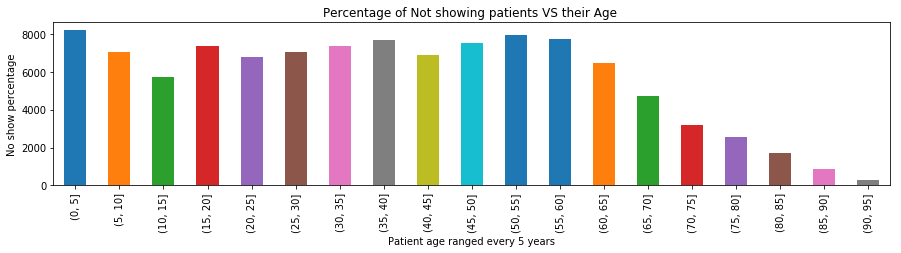

In [148]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
# making No_Show values with numbers yes =1 , No=0
df['No_show_Number'] = df['No_show'].replace(('Yes', 'No'), (1, 0))
df['Age_bins'] = pd.cut(df['Age'], bins)
Age = df[['No_show_Number', 'Age_bins']].groupby('Age_bins').count()

BarChart = Age['No_show_Number'].plot(kind='bar',figsize=(15, 3), title='Percentage of Not showing patients VS their Age ')
BarChart.set_xlabel('Patient age ranged every 5 years')
BarChart.set_ylabel('No show percentage')

We can conclude from the plot ages between 0-5, 35-40 and 50 to 55 have more percentage of others that will not come to their appointment. The 0-5 they are children so it depends on their parents. Howevere, the reason 

### what is the difference betweeen males and females percentage 

Text(0.5,0,'Gender')

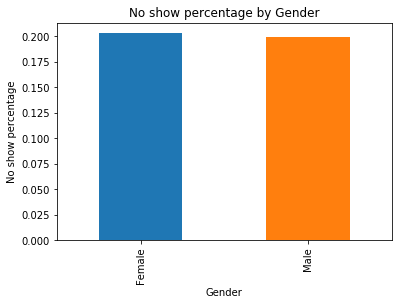

In [118]:
df_g = df[['No_show_Number', 'Gender']].groupby('Gender').mean()
df_g.index = ['Female','Male']
#df_g.head()

plot_title = 'No show percentage by Gender'
plott = df_g['No_show_Number'].plot(kind='bar', title=plot_title)
plott.set_ylabel('No show percentage')
plott.set_xlabel('Gender')



As you can see above there is no much difference between Males and Females. But number Females is not showing to their appointments more.

### Does SMS receiving affect No Show percentage?

Text(0.5,0,'SMS received')

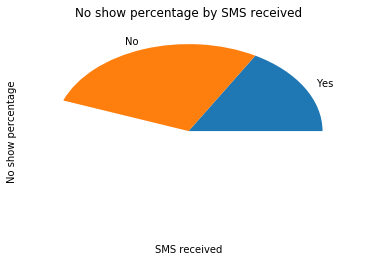

In [146]:
df.SMS_received.unique()
df_SMS = df[['No_show_Number', 'SMS_received']].groupby('SMS_received').mean()
df_SMS.index = ['Yes','No']
df_SMS.head()


plot_title = 'No show percentage by SMS received'
plott = df_SMS['No_show_Number'].plot(kind='bar', title=plot_title)
plott.set_ylabel('No show percentage')
plott.set_xlabel('SMS received')





.

it is clearly that patients that does not receive an SMS are more likly will not show up on their appointments

### Does Weekdays differ from Weekends ?

let find all days percentage

Text(0.5,0,'Day of the week')

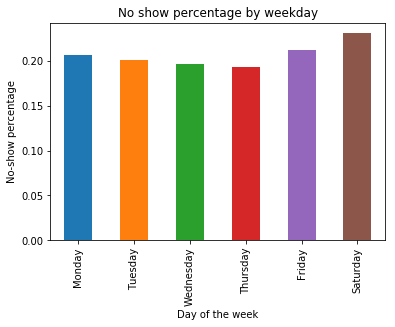

In [145]:
df['DayesIndx'] = df['AppointmentDay'].dt.dayofweek
#df_g.head()
df_weeksDay = df[['No_show_Number', 'DayesIndx']].groupby('DayesIndx').mean()
df_weeksDay.head(7)

df_weeksDay.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plot_title = 'No show percentage by weekday'
plott = df_weeksDay['No_show_Number'].plot(kind='bar', title=plot_title)
plott.set_ylabel('No-show percentage')
plott.set_xlabel('Day of the week')


As we notice from the graph, Weekends are more likly that Patients will not show up especially on Saturday. Unlike the midweek which have low percentage of no show up 

### Scheduled date and the appintment date effect on patients 

In [133]:
# First lets find the difference between the dates
df['DiffDays'] = df['AppointmentDay'] - df['ScheduledDay']
df['DiffDays'] = df['DiffDays'].dt.days

#group by days between
df_diffDays = df[['No_show_Number', 'DiffDays']].groupby('DiffDays').mean()
df_diffDays.head()


,No_show_Number
DiffDays,
-7,1.000000
-2,1.000000
-1,0.046471
0,0.213505
1,0.238216


Text(0.5,0,'Days between scheduling and appointment')

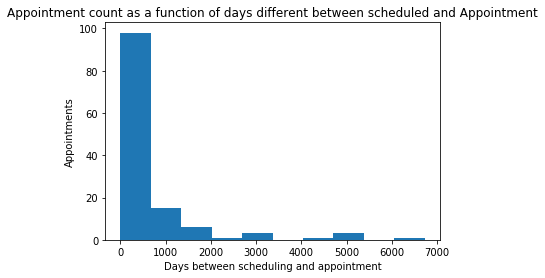

In [143]:
# to get positive values
df_diffDays = df.drop(df.index[df.DiffDays < 0])

df_diffDays = df_diffDays[['No_show_Number', 'DiffDays']].groupby('DiffDays').count()
plot_title = 'Appointment count as a function of days different between scheduled and Appointment'
plott = df_diffDays['No_show_Number'].plot(kind='hist', title=plot_title)
plott.set_ylabel('Appointments')
plott.set_xlabel('Days between scheduling and appointment')

it is clearly shown at the day 0 which means appointment scheduled on the same day of the day of the scheduling peak is obvious also day 1. However, the tail of the graph has more intrested values. Because the appointment count decreases with an increasing number of days. So lets investigate more in the tail.

Text(0.5,0,'Days between scheduling and appointment')

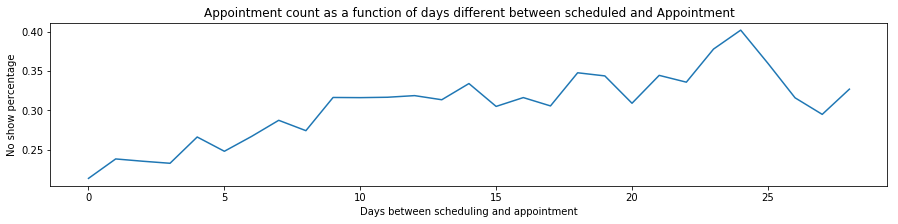

In [141]:
df_diffDays = df.drop(df.index[df.DiffDays < 0])
df_diffDays = df_diffDays.drop(df_diffDays.index[df_diffDays.DiffDays > 28])
df_diffDays = df_diffDays[['No_show_Number', 'DiffDays']].groupby('DiffDays').mean()
ax = df_diffDays['No_show_Number'].plot(kind='line', figsize=(15, 3), title=plot_title)
ax.set_ylabel('No show percentage')
ax.set_xlabel('Days between scheduling and appointment')

So we can conclude from the above graph. if the appointment scheduled in the same day of the appointment it is almost there no No-Show cases for the patients. However once the appointments scheduled days and Schedulling days have more than 10 days difference the patients are more likly will not come. 

<a id='conclusions'></a>
## Conclusions

We have some limitations on this study. Some variabeles werejust reprecented in a 1 or a 0. For example the SMS received variable it only 0 or 1 it does not say how many actually the patient has received the SMS. Also we have a missing data the could be helpful in our analysis. Which is how far the patient is live from hosbital and is the patient have habbit of not showing to his/her appointment. These missing variables could be helpful to determing the of No-Show percentage.  

So I the question stated on the inroduction, we can notice over all the patients that is not receive SMS which have low show up. Furthermore, Patients are more likly busy or enjoying their weekends since the percentage is higher that Weekdays. 
Infents and old people also have high percentage of not showing to thier appointments. So the hosbital should focus in these categories.

Also if the scheduled day and schedulling day have more than 10 days difference the patients are more likly will not come to their appointment. 